In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv(r'student_habits_performance.csv')

In [6]:
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [7]:
print(df.isnull().sum())

student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64


In [9]:
df['parental_education_level'].fillna('Unknown', inplace=True)

In [10]:
for col in ['gender', 'diet_quality', 'part_time_job', 'internet_quality', 'extracurricular_participation']:
    df[col] = df[col].str.capitalize()

In [11]:
df['total_screen_time'] = df['social_media_hours'] + df['netflix_hours']

def sleep_category(hours):
    if hours < 6:
        return "Short"
    elif 6 <= hours <= 8:
        return "Adequate"
    else:
        return "Long"
    
df['sleep_category'] = df['sleep_hours'].apply(sleep_category)

df['high_exam_score'] = df['exam_score'].apply(lambda x: 1 if x >= 75 else 0)

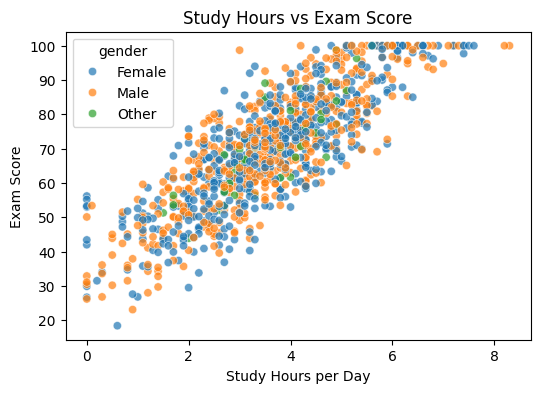

In [29]:
plt.figure(figsize=(6, 4))
sns.scatterplot(df, x='study_hours_per_day', y='exam_score', hue='gender', alpha=0.7)
plt.title('Study Hours vs Exam Score')
plt.xlabel('Study Hours per Day')
plt.ylabel('Exam Score')
plt.show()

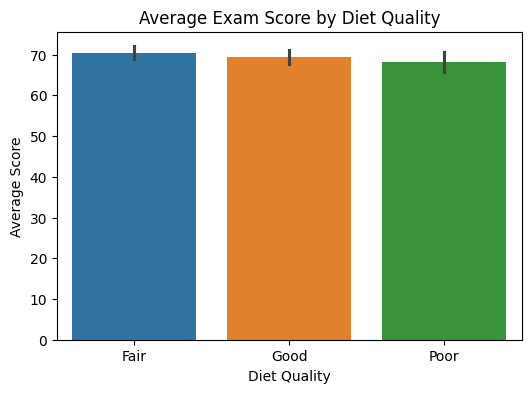

In [28]:
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='diet_quality', y='exam_score', hue = 'diet_quality')
plt.title('Average Exam Score by Diet Quality')
plt.xlabel('Diet Quality')
plt.ylabel('Average Score')
plt.show()


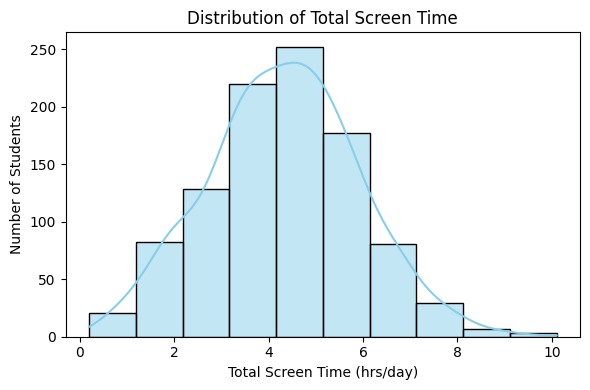

In [33]:
plt.figure(figsize=(6, 4))
sns.histplot(df['total_screen_time'], bins=10, color='skyblue', kde = True)
plt.title('Distribution of Total Screen Time')
plt.xlabel('Total Screen Time (hrs/day)')
plt.ylabel('Number of Students')
plt.tight_layout()
plt.show()

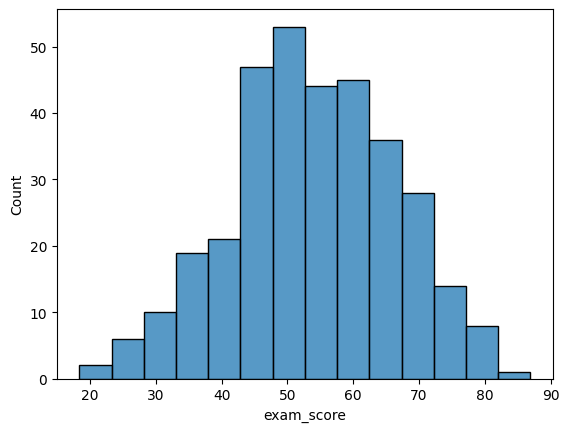

In [34]:
sns.histplot(df[df['study_hours_per_day'] < 3], x='exam_score')
plt.show()

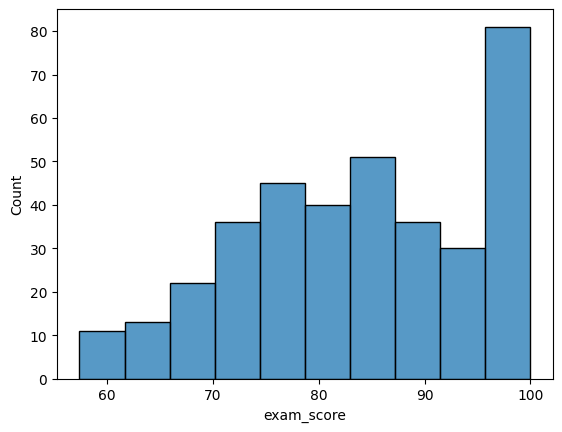

In [35]:
sns.histplot(df[df['study_hours_per_day'] > 4], x='exam_score')
plt.show()